256


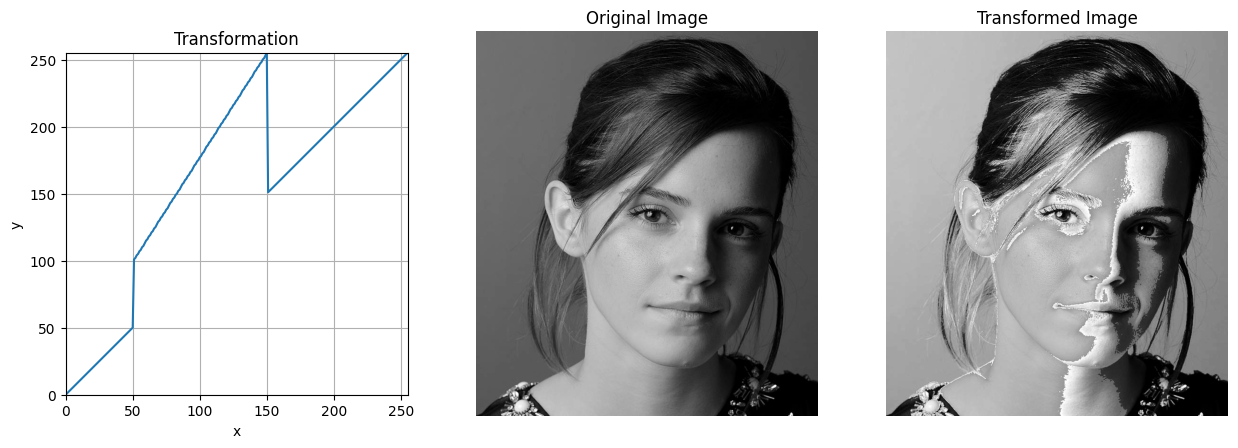

In [6]:
###############Q1###################
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

#create transformation function
c=np.array([(50,50),(150,255)])
t1=np.linspace(0,c[0,1],c[0,0]+1-0).astype('uint8')
t2=np.linspace(c[0,1]+51,c[1,1],c[1,0]-c[0,0]).astype('uint8')
t3=np.linspace(c[1,1]-104,255,255-c[1,0]).astype('uint8')

transform=np.concatenate((t1,t2),axis=0).astype('uint8')
transform=np.concatenate((transform,t3),axis=0).astype('uint8')
print(len(transform))


img_orig=cv.imread('images/emma.jpg',cv.IMREAD_GRAYSCALE)
image_transformed=cv.LUT(img_orig, transform)


fig,ax =plt.subplots(1, 3 ,figsize=(15,5))
ax[0].plot(transform)
ax[0].set(xlabel='x',ylabel='y',title='Transformation')
ax[0].set_xlim(0,255)
ax[0].set_ylim(0,255)
ax[0].set_aspect('equal')
ax[0].grid()


ax[1].imshow(img_orig,cmap='gray')
ax[1].set_title('Original Image')
ax[1].axis('off')

ax[2].imshow(image_transformed,cmap='gray')
ax[2].set_title('Transformed Image')
ax[2].axis('off')

plt.savefig('Assignment1_1_q1.png')
plt.show()  


Question 2

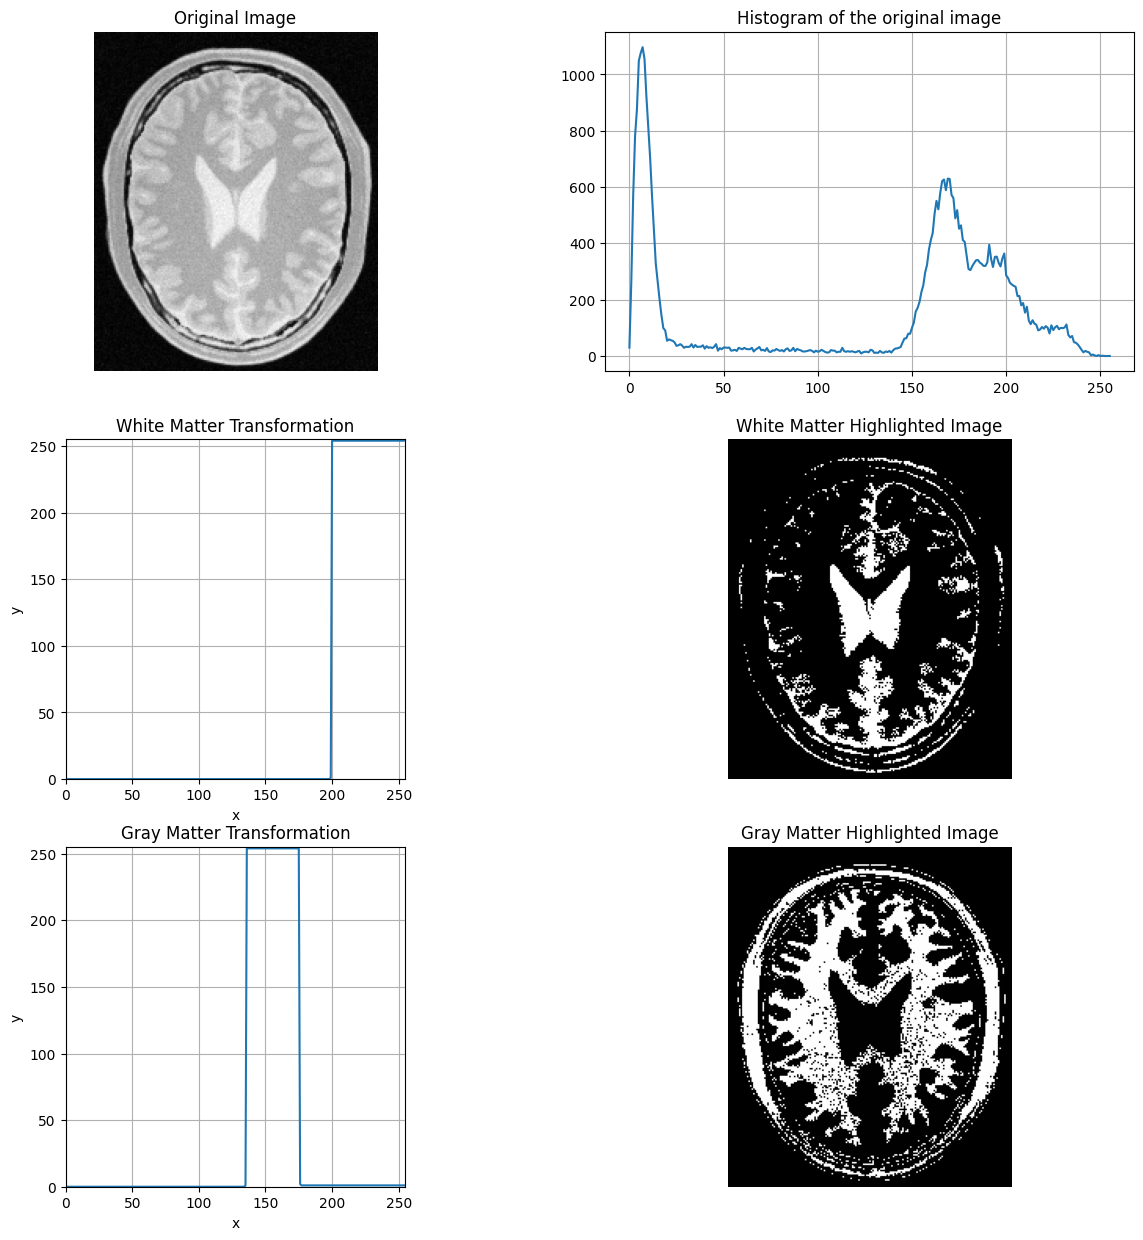

In [8]:
###############Q2_I###################WhiteMatter
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

img_orig=cv.imread('Images/BrainProtonDensitySlice9.png',cv.IMREAD_GRAYSCALE)

fig,ax =plt.subplots(3,2,figsize=(15,15))
ax[0,0].imshow(img_orig,cmap='gray')
ax[0,0].set_title('Original Image')
ax[0,0].axis('off')

#Histogram of the original image
hist = cv.calcHist([img_orig],[0],None,[256],[0,256])
ax[0,1].plot(hist)
ax[0,1].set_title('Histogram of the original image')
ax[0,1].grid()


#Transformation function for white matter
c=np.array([(200,255)])
t1=np.linspace(0,1,c[0,0]-0).astype('uint8')
t2=np.linspace(c[0,1]-1,255,255-c[0,0]+1).astype('uint8')

transform=np.concatenate((t1,t2),axis=0).astype('uint8')
image_transformed=cv.LUT(img_orig, transform)

ax[1,0].plot(transform)
ax[1,0].set(xlabel='x',ylabel='y',title='White Matter Transformation')
ax[1,0].set_xlim(0,255)
ax[1,0].set_ylim(0,255)
ax[1,0].set_aspect('equal')
ax[1,0].grid()

ax[1,1].imshow(image_transformed,cmap='gray')
ax[1,1].set_title('White Matter Highlighted Image')
ax[1,1].axis('off')

#Transformation function for gray matter
c2=np.array([(135,255),(175,255)])
t1_2=np.linspace(0,1,c2[0,0]+1-0).astype('uint8')
t2_2=np.linspace(255,254,c2[1,0]-c2[0,0]).astype('uint8')
t3_2=np.linspace(2,1,255-c2[1,0]).astype('uint8')
transform_2=np.concatenate((t1_2,t2_2),axis=0).astype('uint8')
transform_2=np.concatenate((transform_2,t3_2),axis=0).astype('uint8')
image_transformed_2=cv.LUT(img_orig, transform_2)

ax[2,0].plot(transform_2)
ax[2,0].set(xlabel='x',ylabel='y',title='Gray Matter Transformation')
ax[2,0].set_xlim(0,255)
ax[2,0].set_ylim(0,255)
ax[2,0].set_aspect('equal')
ax[2,0].grid()

ax[2,1].imshow(image_transformed_2,cmap='gray')
ax[2,1].set_title('Gray Matter Highlighted Image')
ax[2,1].axis('off')



plt.savefig('Assignment1_1_q2_part1.png')
plt.show()  



Question 3

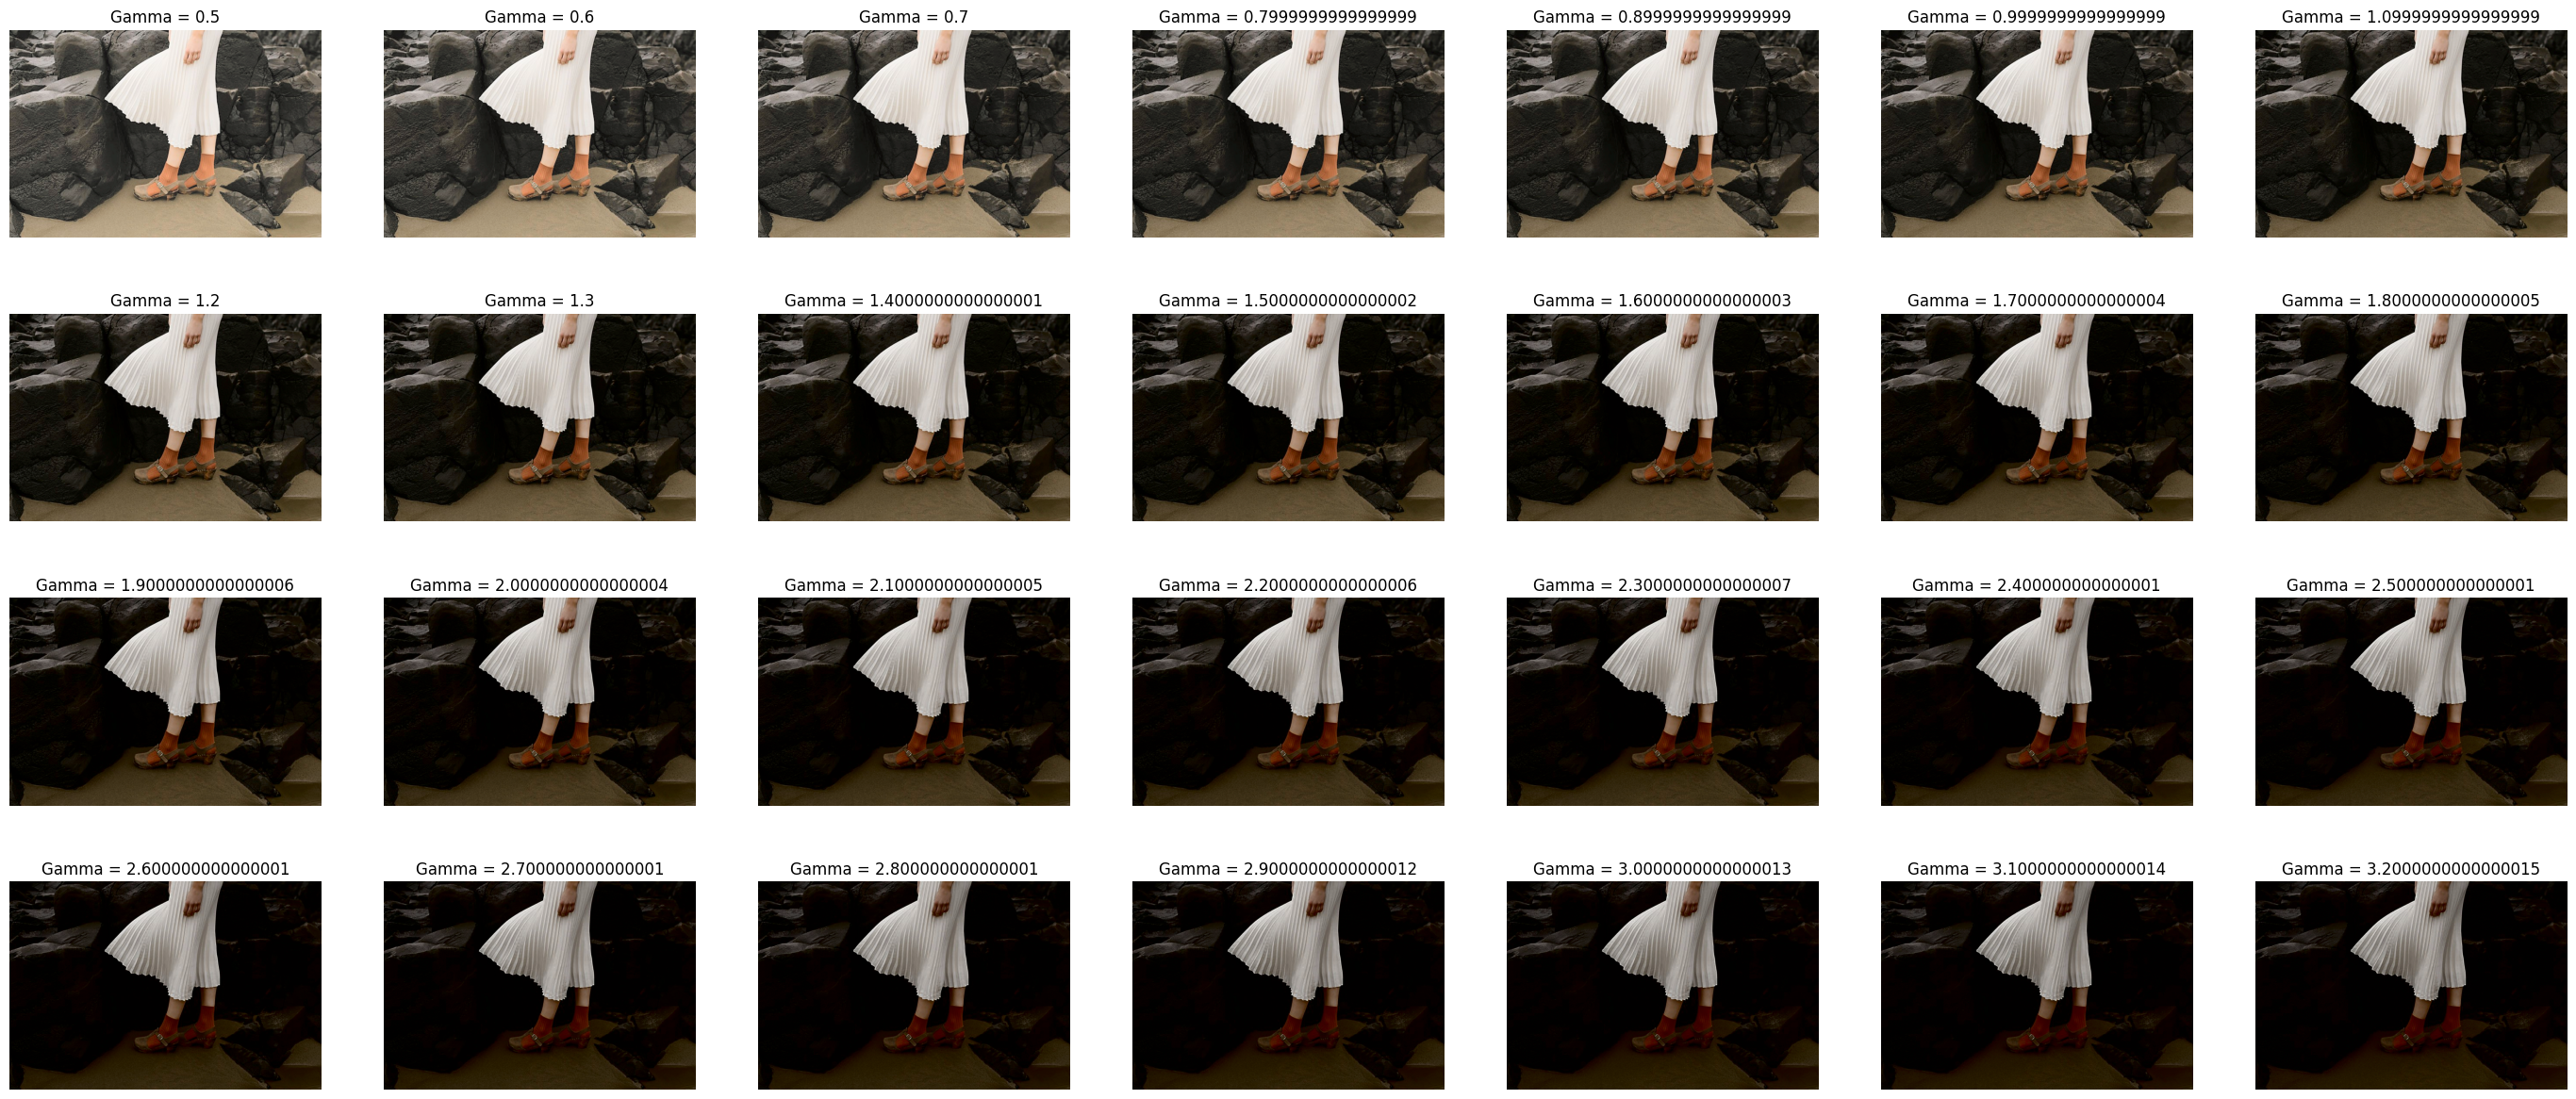

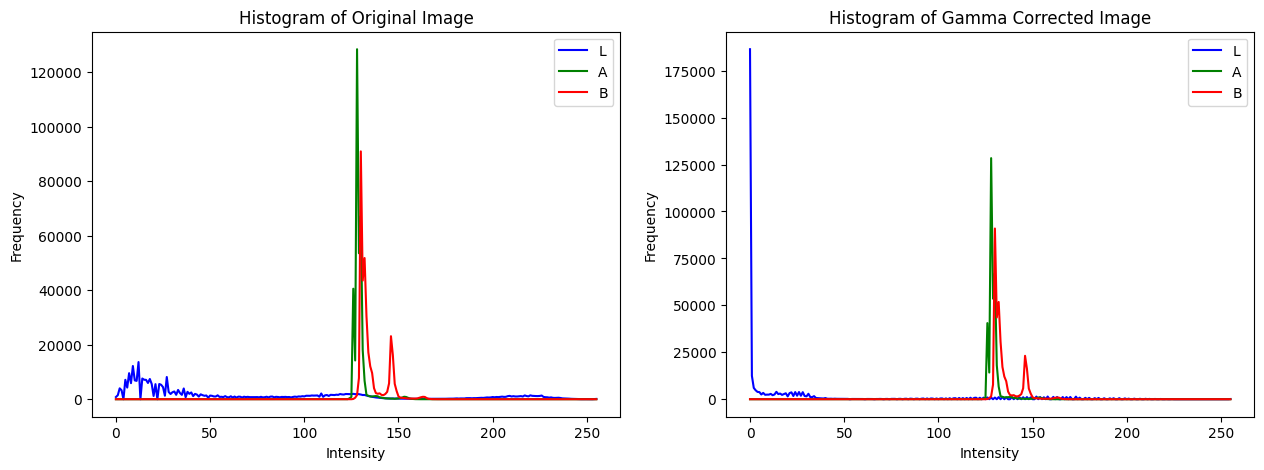

In [27]:
########################################################################
# Gamma and Histograms

%matplotlib inline
import cv2 as cv
import matplotlib.pyplot as plt
import numpy as np

img_orig = cv.imread('images/highlights_and_shadows.jpg', cv.IMREAD_COLOR)
Lab_image = cv.cvtColor(img_orig, cv.COLOR_BGR2LAB)
l, a, b = cv.split(Lab_image)

fig,ax= plt.subplots(4,7,figsize=(35,15))
gamma = 0.5

for i in range(28):
    gamma_grid= np.array([((i / 255.0) ** gamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
    l_gamma_corrected = cv.LUT(l, gamma_grid)
    img_gamma_corrected = cv.merge((l_gamma_corrected, a, b))
    img_corrected = cv.cvtColor(img_gamma_corrected, cv.COLOR_LAB2RGB)
    ax[i//7,i%7].imshow(img_corrected)
    ax[i//7,i%7].axis('off')
    ax[i//7,i%7].set_title('Gamma = '+str(gamma))
    gamma+=0.1

plt.show()

gamma= 1.3
gamma_grid= np.array([((i / 255.0) ** gamma) * 255 for i in np.arange(0, 256)]).astype("uint8")
l_gamma_corrected_1 = cv.LUT(l, gamma_grid)
img_gamma_corrected_1 = cv.merge((l_gamma_corrected, a, b))

fig, ax= plt.subplots(1,2,figsize=(15,5))
color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv.calcHist([Lab_image],[i],None,[256],[0,256])
    ax[0].plot(histr,color = col)
    ax[0].set_title('Histogram of Original Image')
    ax[0].set_xlabel('Intensity')
    ax[0].set_ylabel('Frequency')
    ax[0].legend(['L','A','B'])

    hist_gamma = cv.calcHist([img_gamma_corrected_1],[i],None,[256],[0,256])
    ax[1].plot(hist_gamma,color = col)
    ax[1].set_title('Histogram of Gamma Corrected Image')
    ax[1].set_xlabel('Intensity')
    ax[1].set_ylabel('Frequency')
    ax[1].legend(['L','A','B'])

plt.show()



Question 4

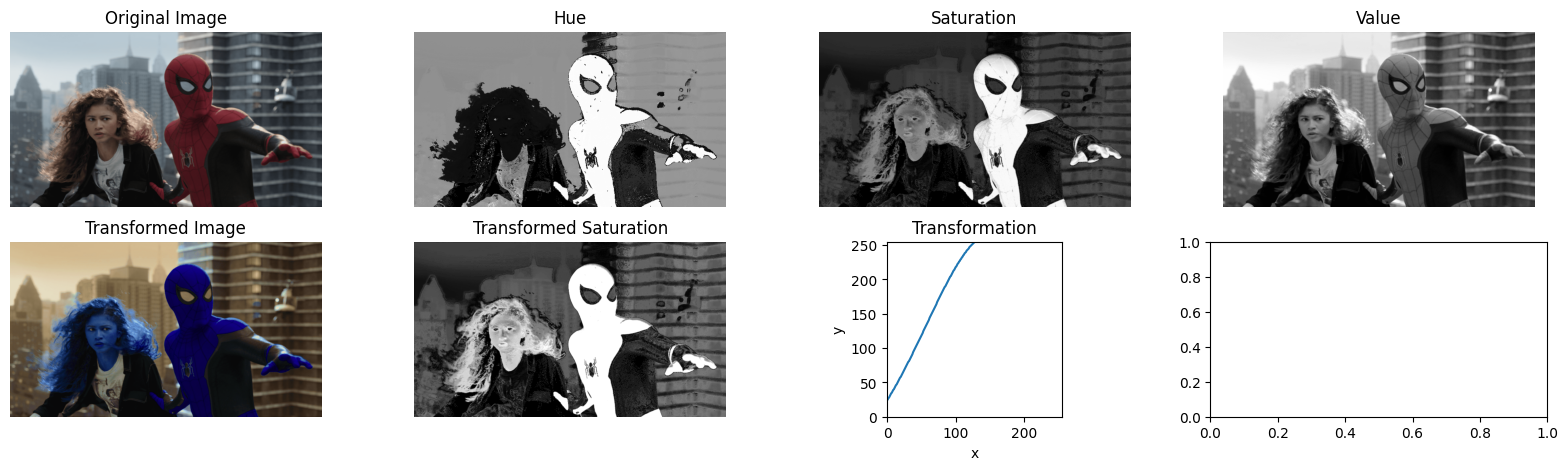

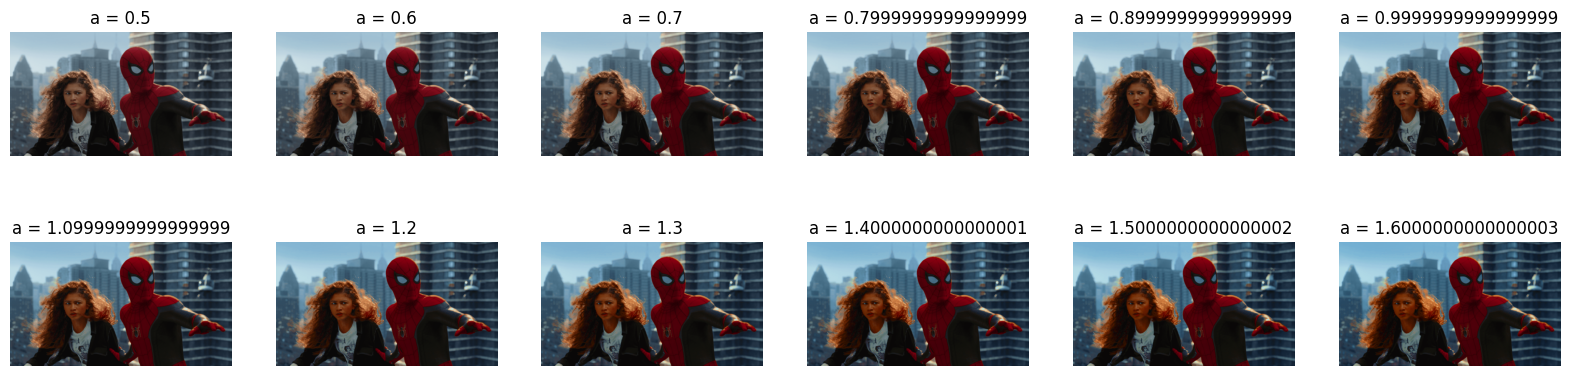

In [38]:
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

# Load the image
image = cv.imread('images/spider.png')

# Convert the image to HSV color space
hsv_image = cv.cvtColor(image, cv.COLOR_BGR2HSV)

# Split the HSV image into its components
hue, saturation, value = cv.split(hsv_image)

def f(x,a,sigma=70):
    f1 = x+a*128*np.exp(-(x-128)**2*(1/(sigma**2*2)))
    return min(f1,255)

# Define alpha and sigma
a = 1  #adjust aplha

hist= cv.calcHist([saturation],[0],None,[256],[0,256])

#transform
transform= np.array([f(x,a) for x in np.arange(0, 256)]).astype("uint8")
image_transformed = cv.LUT(saturation, transform)

hist_transform= cv.calcHist([image_transformed],[0],None,[256],[0,256])
hsv_image_transformed = cv.merge((hue, image_transformed, value))

fig,ax= plt.subplots(2,4,figsize=(20,5))

#original image
ax[0,0].imshow(cv.cvtColor(image, cv.COLOR_BGR2RGB))
ax[0,0].set_title('Original Image')
ax[0,0].axis('off')

#HSV Planes
ax[0,1].imshow(hue,cmap='gray')
ax[0,1].set_title('Hue')
ax[0,1].axis('off')

ax[0,2].imshow(saturation,cmap='gray')
ax[0,2].set_title('Saturation')
ax[0,2].axis('off')

ax[0,3].imshow(value,cmap='gray')
ax[0,3].set_title('Value')
ax[0,3].axis('off')


#transformed image
ax[1,0].imshow(cv.cvtColor(cv.cvtColor(hsv_image_transformed, cv.COLOR_HSV2RGB), cv.COLOR_BGR2RGB))
ax[1,0].set_title('Transformed Image')
ax[1,0].axis('off')

#transformed saturation plane
ax[1,1].imshow(image_transformed,cmap='gray')
ax[1,1].set_title('Transformed Saturation')
ax[1,1].axis('off')

#transformation function
ax[1,2].plot(transform)
ax[1,2].set(xlabel='x',ylabel='y',title='Transformation')
ax[1,2].set_xlim(0,255)
ax[1,2].set_ylim(0,255)
ax[1,2].set_aspect('equal')

plt.show()


#plot various a values
fig,ax= plt.subplots(2,6,figsize=(20,5))
a=0.5
for j in range(2):
    for i in range(6):
        transform= np.array([f(x,a) for x in np.arange(0, 256)]).astype("uint8")
        image_transformed = cv.LUT(saturation, transform)
        hsv_image_transformed = cv.merge((hue, image_transformed, value))
        ax[j,i].imshow(cv.cvtColor(hsv_image_transformed, cv.COLOR_HSV2RGB))
        ax[j,i].set_title('a = '+str(a))
        ax[j,i].axis('off')
        a+=0.1
      



plt.show()




Question 5

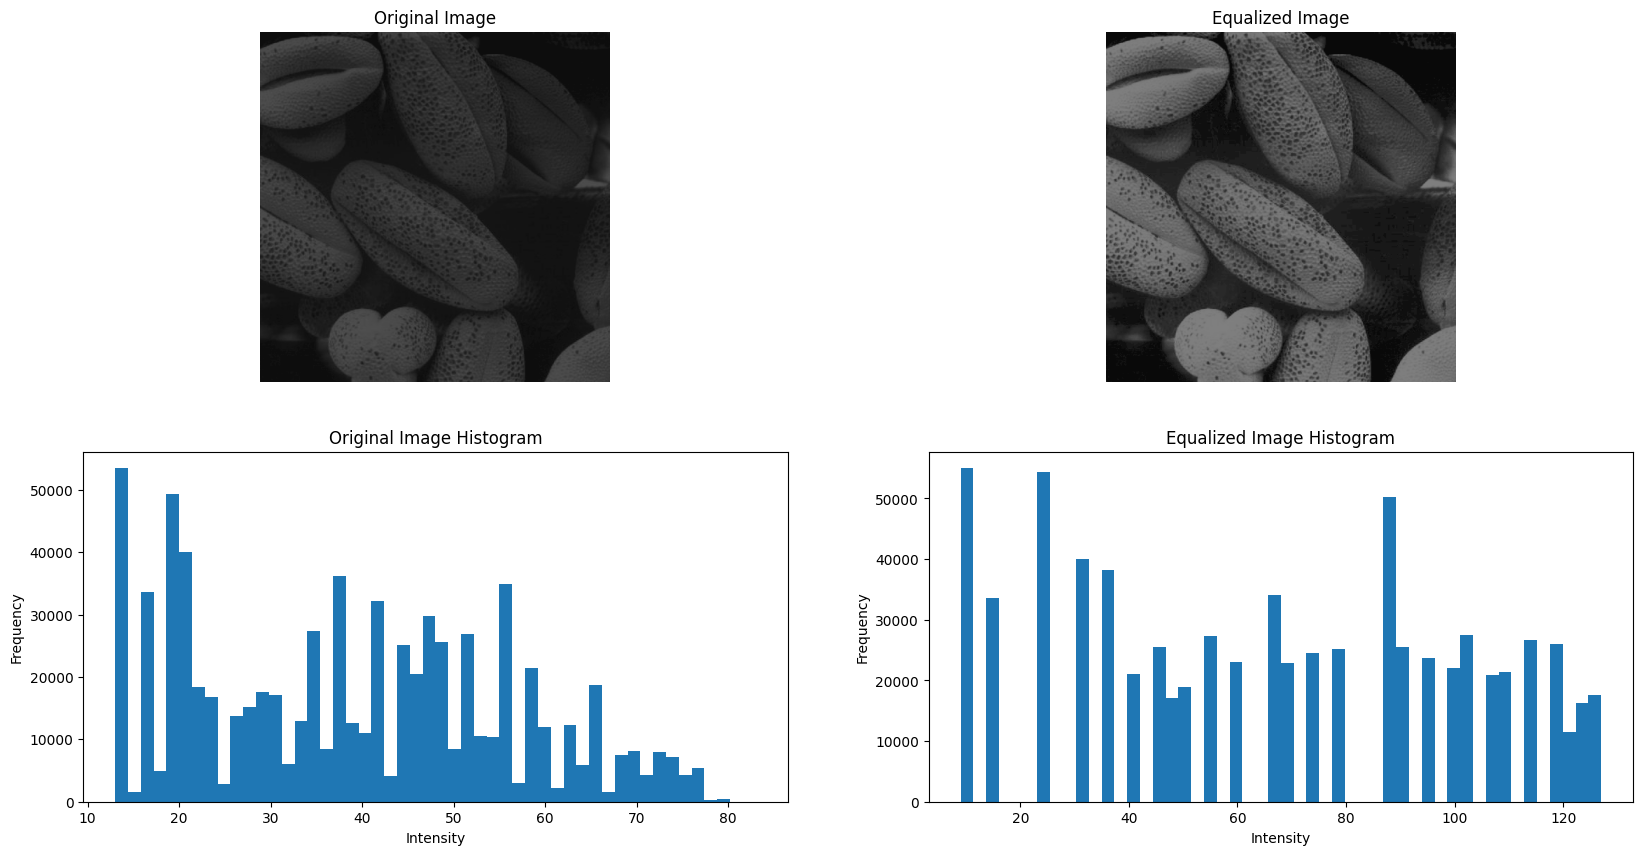

In [11]:
%matplotlib inline
import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

def my_histogram_equalization(img_path, bins=2):
    img = cv.imread(img_path, cv.IMREAD_COLOR)
    img_flatten = img.flatten()

    levels = 256 // bins
    n_pixels_in_each_level = np.zeros(levels)

    for i in range(levels):
        n_pixels_in_each_level[i] = np.sum((img_flatten >= i * bins) & (img_flatten < (i + 1) * bins))

    probability_each_level = n_pixels_in_each_level / np.sum(n_pixels_in_each_level)

    cumulative_probability_each_level = np.zeros(levels)
    cumulative_probability_each_level[0] = probability_each_level[0]

    for i in range(1, levels):
        cumulative_probability_each_level[i] = cumulative_probability_each_level[i - 1] + probability_each_level[i]

    resultant_levels = np.zeros(levels)

    for i in range(levels):
        resultant_levels[i] = np.round(cumulative_probability_each_level[i] * (levels - 1))

    resultant_levels = resultant_levels.astype(np.uint8)
    img_equalized = np.zeros(img_flatten.shape)

    for i in range(levels):
        img_equalized[(img_flatten >= i * bins) & (img_flatten < (i + 1) * bins)] = resultant_levels[i]

    img_equalized = img_equalized.reshape(img.shape).astype(np.uint8)
    return img_equalized

# Example usage
input_image_path = "images/shells.tif"
equalized_img = my_histogram_equalization(input_image_path)

fig, ax = plt.subplots(2, 2, figsize=(20, 10))
ax[0,0].imshow(cv.cvtColor(cv.imread(input_image_path), cv.COLOR_BGR2RGB))
ax[0,0].set_title('Original Image')
ax[0,0].axis('off')

ax[0,1].imshow(cv.cvtColor(equalized_img, cv.COLOR_BGR2RGB))
ax[0,1].set_title('Equalized Image')
ax[0,1].axis('off')

# plot Histograms
ax[1,0].hist(cv.imread(input_image_path).flatten(), bins=50)
ax[1,0].set_title('Original Image Histogram')
ax[1,0].set_xlabel('Intensity')
ax[1,0].set_ylabel('Frequency')

ax[1,1].hist(equalized_img.flatten(), bins=50)
ax[1,1].set_title('Equalized Image Histogram')
ax[1,1].set_xlabel('Intensity')
ax[1,1].set_ylabel('Frequency')

plt.show()



Question 6

(0.0, 1.0, 0.0, 1.0)

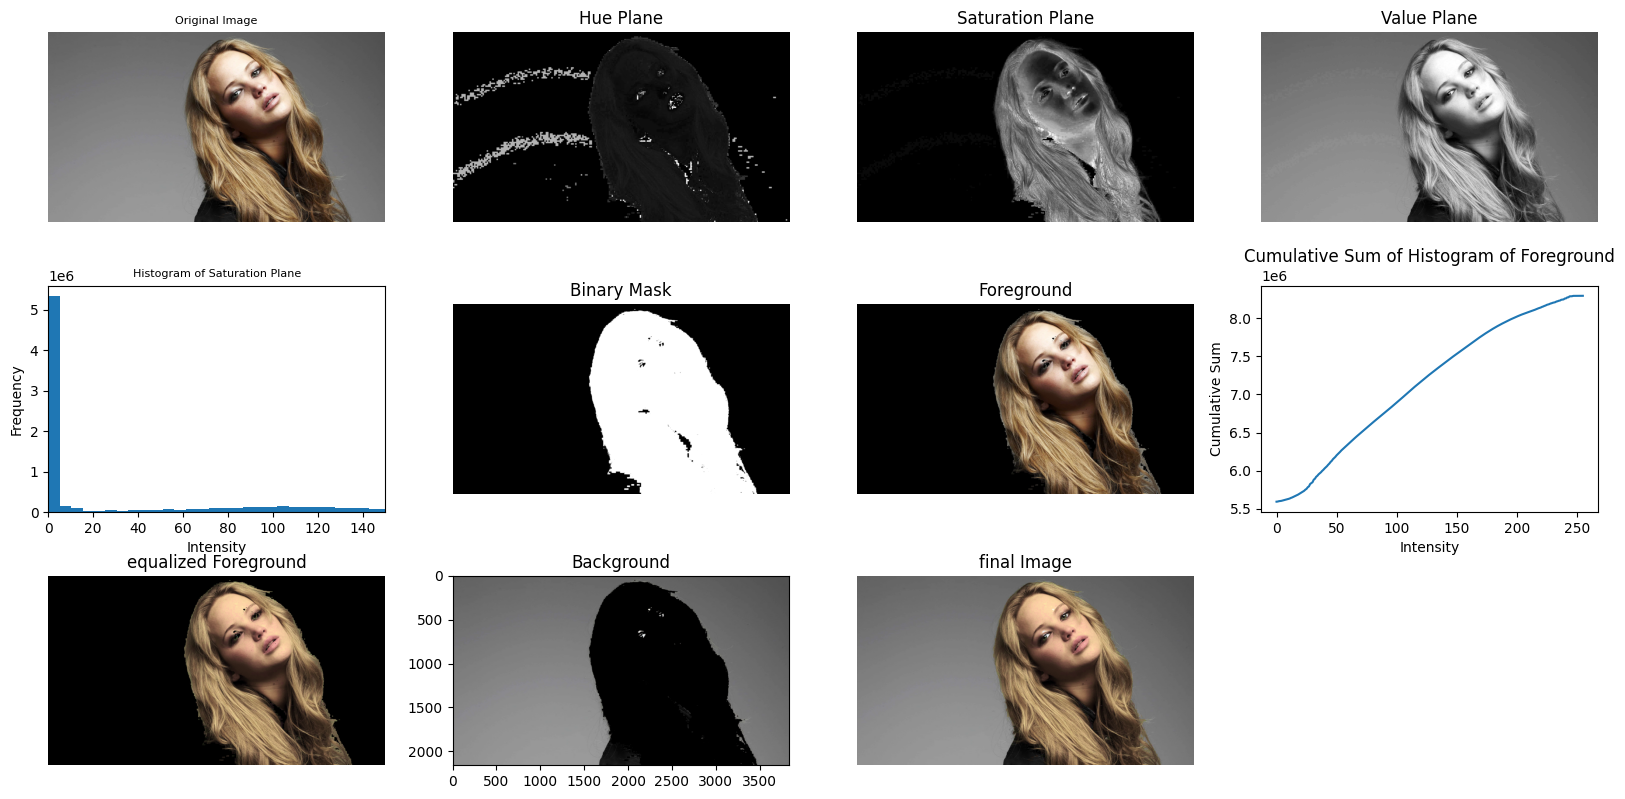

In [58]:
%matplotlib inline

import cv2 as cv
import numpy as np
import matplotlib.pyplot as plt

#read the image
img = cv.imread('images/jeniffer.jpg',cv.IMREAD_COLOR)

#convert to HSV color space
img_hsv = cv.cvtColor(img, cv.COLOR_BGR2HSV)
h,s,v = cv.split(img_hsv)

#plot the original image
fig,ax = plt.subplots(3,4,figsize=(20,10))
ax[0,0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0,0].set_title('Original Image',fontsize=8)
ax[0,0].axis('off')

#plot the hue plane
ax[0,1].imshow(h,cmap='gray')
ax[0,1].set_title('Hue Plane')
ax[0,1].axis('off')

#plot the saturation plane
ax[0,2].imshow(s,cmap='gray')
ax[0,2].set_title('Saturation Plane')
ax[0,2].axis('off')

#plot the value plane
ax[0,3].imshow(v,cmap='gray')
ax[0,3].set_title('Value Plane')
ax[0,3].axis('off')

# plot the histoygram of the saturation plane

ax[1,0].hist(s.flatten(),bins=50)
ax[1,0].set_title('Histogram of Saturation Plane',fontsize=8)
ax[1,0].set_xlabel('Intensity')
ax[1,0].set_ylabel('Frequency')
ax[1,0].set_xlim([0,150])


# creating binary mask using the threshold value
threshold = 15
mask = np.zeros(s.shape)
mask[s>threshold] = 255

#plot the mask
ax[1,1].imshow(mask,cmap='gray')
ax[1,1].set_title('Binary Mask')
ax[1,1].axis('off')

mask_cvt_bgr = cv.cvtColor(mask.astype(np.uint8), cv.COLOR_GRAY2BGR)
foreground = cv.bitwise_and(img,mask_cvt_bgr)

#plot the foreground
ax[1,2].imshow(cv.cvtColor(foreground, cv.COLOR_BGR2RGB))
ax[1,2].set_title('Foreground')
ax[1,2].axis('off')

#cumulative sum of the histogram of the foreground
hist = cv.calcHist([cv.cvtColor(foreground, cv.COLOR_BGR2GRAY)],[0],None,[256],[0,256])
cumulative_sum = np.cumsum(hist)

#plot the cumulative sum
ax[1,3].plot(cumulative_sum)
ax[1,3].set_title('Cumulative Sum of Histogram of Foreground')
ax[1,3].set_xlabel('Intensity')
ax[1,3].set_ylabel('Cumulative Sum')


def my_histogram_equalization(img, bins=2):
    img_flatten = img.flatten()

    levels = 256 // bins
    n_pixels_in_each_level = np.zeros(levels)

    for i in range(levels):
        n_pixels_in_each_level[i] = np.sum((img_flatten >= i * bins) & (img_flatten < (i + 1) * bins))

    probability_each_level = n_pixels_in_each_level / np.sum(n_pixels_in_each_level)

    cumulative_probability_each_level = np.zeros(levels)
    cumulative_probability_each_level[0] = probability_each_level[0]

    for i in range(1, levels):
        cumulative_probability_each_level[i] = cumulative_probability_each_level[i - 1] + probability_each_level[i]

    resultant_levels = np.zeros(levels)

    for i in range(levels):
        resultant_levels[i] = np.round(cumulative_probability_each_level[i] * (levels - 1))

    resultant_levels = resultant_levels.astype(np.uint8)
    img_equalized = np.zeros(img_flatten.shape)

    for i in range(levels):
        img_equalized[(img_flatten >= i * bins) & (img_flatten < (i + 1) * bins)] = resultant_levels[i]

    img_equalized = img_equalized.reshape(img.shape).astype(np.uint8)
    return img_equalized


## adjusting the foreground image
foreground_hsv = cv.cvtColor(foreground, cv.COLOR_BGR2HSV)
fg_h,fg_s,fg_v = cv.split(foreground_hsv)

#histogram equalization of the saturation plane
fg_s_equalized = my_histogram_equalization(fg_s,bins=2)
#merge
fg_hsv_equalized = cv.merge([fg_h,fg_s_equalized,fg_v])

#convert to BGR
fg_equalized = cv.cvtColor(fg_hsv_equalized, cv.COLOR_HSV2RGB)

#plot the foreground
ax[2,0].imshow(fg_equalized)
ax[2,0].set_title('equalized Foreground')
ax[2,0].axis('off')

#background mask invert foreground mask
bg_mask = 255 - mask

#extract the background
background = cv.bitwise_and(img,cv.cvtColor(bg_mask.astype(np.uint8), cv.COLOR_GRAY2BGR))

#plot the background
ax[2,1].imshow(cv.cvtColor(background, cv.COLOR_BGR2RGB))
ax[2,1].set_title('Background')

#add the foreground and background
final_image = cv.add(cv.cvtColor(fg_equalized,cv.COLOR_RGB2BGR),background)

#plot the final image
ax[2,2].imshow(cv.cvtColor(final_image, cv.COLOR_BGR2RGB))
ax[2,2].set_title('final Image')
ax[2,2].axis('off')

ax[2,3].axis('off')


Question 7

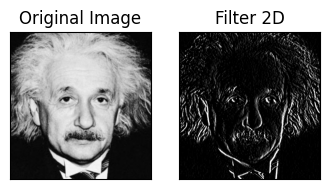

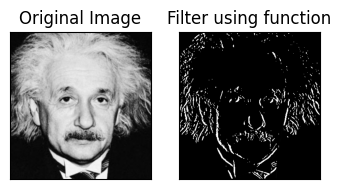

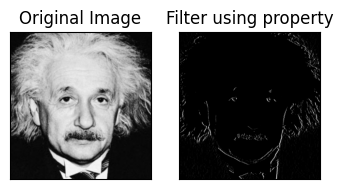

In [50]:
##################filter2D#####################
%matplotlib inline
import cv2 as cv
import numpy as np
from matplotlib import pyplot as plt
import math

img=cv.imread('images/einstein.png',cv.IMREAD_GRAYSCALE)
kernel=np.array([[1,0,-1],[2,0,-2],[1,0,-1]], dtype='float')
imgconv=cv.filter2D(img,-1,kernel)

fig,axes=plt.subplots(1,2,sharex='all',sharey='all',figsize=(4,4))
axes[0].imshow(img,cmap='gray')
axes[0].set_title('Original Image')
axes[1].set_xticks([]),axes[0].set_yticks([])
axes[1].imshow(imgconv,cmap='gray')
axes[1].set_title('Filter 2D')
axes[1].set_xticks([]),axes[1].set_yticks([])
plt.show()

###############################################
def filter(image, kernel):
    assert kernel.shape[0] == kernel.shape[1] and kernel.shape[0] % 2 == 1
    k_hh, k_hw= math.floor(kernel.shape[0]/2), math.floor(kernel.shape[1]/2)
    h, w=image.shape
    image_float = cv.normalize(image.astype('float'), None, 0.0, 1.0, cv.NORM_MINMAX)
    result = np.zeros(image.shape,'float')

    for m in range(k_hh,h-k_hh):
        for n in range(k_hw,w-k_hw):
            result[m,n] = np.dot(image_float[m-k_hh:m+k_hh+1,n-k_hw:n+k_hw+1].flatten(),kernel.flatten())
    return result


imgconv_2=filter(img,kernel)
imgconv_2=imgconv_2*2.5
imgconv_2=imgconv_2.astype(np.uint8)

ig,axes=plt.subplots(1,2,sharex='all',sharey='all',figsize=(4,4))
axes[0].imshow(img,cmap='gray')
axes[0].set_title('Original Image')
axes[1].set_xticks([]),axes[0].set_yticks([])
axes[1].imshow(imgconv_2,cmap='gray')
axes[1].set_title('Filter using function')
axes[1].set_xticks([]),axes[1].set_yticks([])
plt.show()

########################using given property##############
kernel_1 = np.array([[1],[2],[1]],dtype=np.float32)
kernel_2 = np.array([[1,0,-1]],dtype=np.float32)

filtered_image_1 = cv.filter2D (img, -1 , kernel_1)
filtered_image_2 = cv.filter2D (filtered_image_1, -1 , kernel_2)
ig,axes=plt.subplots(1,2,sharex='all',sharey='all',figsize=(4,4))
axes[0].imshow(img,cmap='gray')
axes[0].set_title('Original Image')
axes[1].set_xticks([]),axes[0].set_yticks([])
axes[1].imshow(filtered_image_2,cmap='gray')
axes[1].set_title('Filter using property')
axes[1].set_xticks([]),axes[1].set_yticks([])
plt.show()




Question 8

Question 9

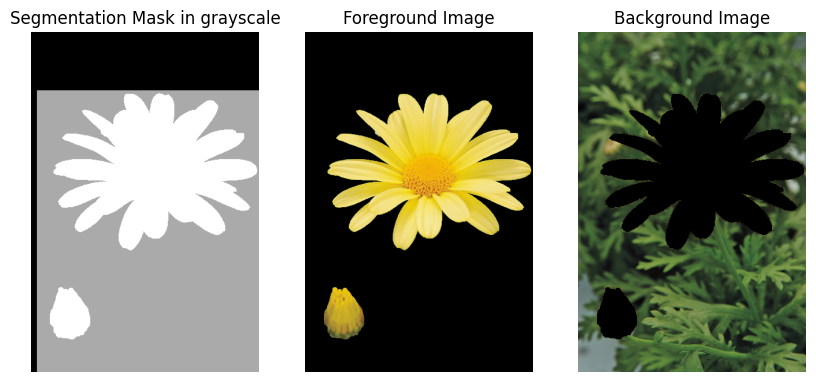

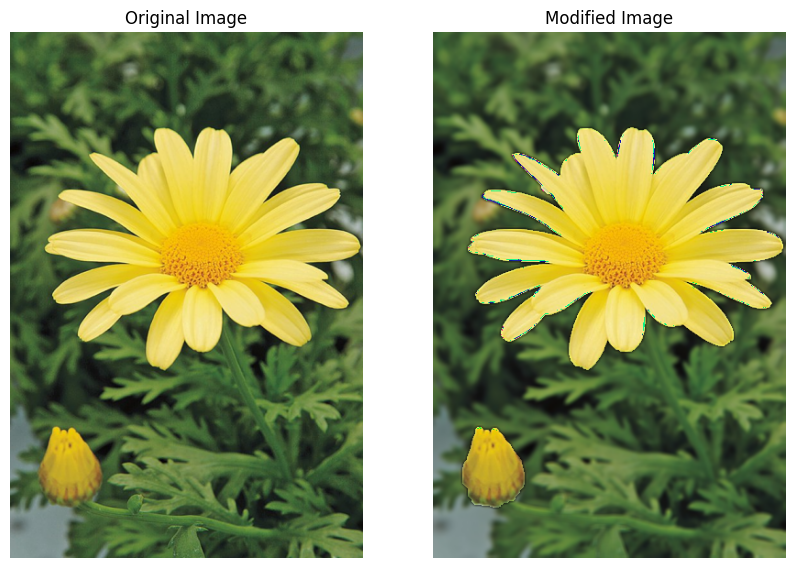

In [2]:
%matplotlib inline  
import numpy as np
import cv2 as cv
import matplotlib.pyplot as plt

img = cv.imread('images/flower.png')
mask = np.zeros(img.shape[:2],dtype=np.uint8)

background_model = np.zeros((1,65),dtype=np.float64)  # this is used by the algo
foreground_model = np.zeros((1,65),dtype=np.float64)    

rect = (10,100,520,500)

cv.grabCut(img,mask,rect,background_model,foreground_model,5,cv.GC_INIT_WITH_RECT)

mask2 = np.where((mask==2)|(mask==0),0,1).astype('uint8')  # we are taaking sure backgroounds and potential
                                        #backgrounds

image_cut = img*mask2[:,:,np.newaxis]  # we are multiplying the mask with the image to get the cut image

fig,ax = plt.subplots(1,3,figsize=(10,8))

#plot segmentation mask
ax[0].imshow(mask,cmap='gray')
ax[0].set_title('Segmentation Mask in grayscale')
ax[0].axis('off')
#plot foreground image
ax[1].imshow(cv.cvtColor(image_cut, cv.COLOR_BGR2RGB))
ax[1].set_title('Foreground Image')
ax[1].axis('off')
#plot background image
ax[2].imshow(cv.cvtColor(img-image_cut, cv.COLOR_BGR2RGB))
ax[2].set_title('Background Image')
ax[2].axis('off')
plt.show()

background_img = img-image_cut
#apply gaussian blur to background image
sigma = 5
background_img_blur = cv.GaussianBlur(background_img,(5,5),sigma,sigma)
modified_image = image_cut + background_img_blur

fig,ax = plt.subplots(1,2,figsize=(10,8))
#plot original image
ax[0].imshow(cv.cvtColor(img, cv.COLOR_BGR2RGB))
ax[0].set_title('Original Image')
ax[0].axis('off')
#plot modified image
ax[1].imshow(cv.cvtColor(modified_image, cv.COLOR_BGR2RGB))
ax[1].set_title('Modified Image')
ax[1].axis('off')

plt.show()


Question 8

In [1]:
import numpy as np
import matplotlib.pyplot as plt
import cv2 as cv
import os  # Import the os module for working with file paths

def nearest_neighbor_zoom(image, scaling_factor):
    height, width, channels = image.shape

    new_height = int(height * scaling_factor)
    new_width = int(width * scaling_factor)

    new_image = np.zeros((new_height, new_width, channels), dtype=image.dtype)

    for y in range(new_height):
        for x in range(new_width):
            u = int(x / scaling_factor)
            v = int(y / scaling_factor)
            new_image[y, x, :] = image[v, u, :]

    return new_image

scaling_factor = 4
for i in range(11):
    path = f'zooming\\im{i+1:02}small.png'
    # Check if the file exists before attempting to load it
    if os.path.isfile(path):
        img = cv.imread(path)
        if img is not None:
            new_image = nearest_neighbor_zoom(img, scaling_factor)
            output_path = f'zooming\\zoomed\\im{i+1:02}small_zoomed.png'
            cv.imwrite(output_path, new_image)
            print(f"Image {i+1} done")
        else:
            print(f"Error: Failed to load image at path: {path}")
    else:
        print(f"Error: Image file not found at path: {path}")


Image 1 done
Image 2 done
Image 3 done
Image 4 done
Image 5 done
Image 6 done
Image 7 done
Image 8 done
Image 9 done
Image 10 done
Image 11 done


In [1]:
import math
import matplotlib.pyplot as plt
import numpy as np
import cv2 as cv

def zoomed_image_bilinear(image,scaling_factor):
    height, width , channels = image.shape
    new_height = int(height*scaling_factor)
    new_width = int (width * scaling_factor)

    new_image = np.zeros((new_height,new_width,channels),dtype=image.dtype)

    for y in range(new_height):
        for x in range(new_width):
            u = x/scaling_factor
            v = y/scaling_factor

            u1,u2 = math.floor(u),math.ceil(u)
            v1,v2 = math.floor(v),math.ceil(v)

            if u2 >= width:
                u2 = width - 1
            if v2 >= height:
                v2 = height - 1
            
            A = image[v1,u1,:]
            B = image[v1,u2,:]
            C = image[v2,u1,:]
            D = image[v2,u2,:]

             # Calculate bilinearly interpolated pixel values for each channel
            for channel in range(channels):
                new_image[y, x, channel] = (
                    (u2 - u) * (v2 - v) * A[channel] +
                    (u - u1) * (v2 - v) * B[channel] +
                    (u2 - u) * (v - v1) * C[channel] +
                    (u - u1) * (v - v1) * D[channel]
                )
    
    return new_image


scaling_factor = 4
for i in range(11):
    path = f'zooming\im{i+1:02}small.png'
    #print(path)
    img = cv.imread(path)
    new_image = zoomed_image_bilinear(img,scaling_factor)
    cv.imwrite(f'zooming\zoomed_BL\im{i+1:02}small_zoomed_bilinear.png',new_image)
    print(f"image {i+1} done")
                

image 1 done
image 2 done
image 3 done
image 4 done
image 5 done
image 6 done
image 7 done
image 8 done
image 9 done
image 10 done
image 11 done


In [1]:
def zoomed_image_bilinear(image,scaling_factor):
    height, width , channels = image.shape
    new_height = int(height*scaling_factor)
    new_width = int (width * scaling_factor)

    new_image = np.zeros((new_height,new_width,channels),dtype=image.dtype)

    for y in range(new_height):
        for x in range(new_width):
            u = x/scaling_factor
            v = y/scaling_factor
            u1,u2 = math.floor(u),math.ceil(u)
            v1,v2 = math.floor(v),math.ceil(v)

            if u2 >= width:
                u2 = width - 1
            if v2 >= height:
                v2 = height - 1
            A = image[v1,u1,:]
            B = image[v1,u2,:]
            C = image[v2,u1,:]
            D = image[v2,u2,:]
             # Calculate bilinearly interpolated pixel values for each channel
            for channel in range(channels):
                new_image[y, x, channel] = (
                    (u2 - u) * (v2 - v) * A[channel] +
                    (u - u1) * (v2 - v) * B[channel] +
                    (u2 - u) * (v - v1) * C[channel] +
                    (u - u1) * (v - v1) * D[channel]
                )
    
    return new_image


In [2]:
import cv2 as cv
import numpy as np
#calculateing SSD- normalized sun of squares
def SSD_of_an_image(image1,image2):
    #print(image1.shape,image2.shape)
    assert image1.shape == image2.shape
    height, width , channels = image1.shape
    ssd = np.int64(0)
    for y in range(height):
        for x in range(width):
            for channel in range(channels):
                ssd += (image1[y,x,channel] - image2[y,x,channel])**2
        #print(ssd)
    
    return ssd/(height*width*channels)

for i in range(4, 6): 
    # Load original image and zoomed images using both methods
    original_image = cv.imread(f'zooming/im{i:02}.png')
    nn_zoomed_image = cv.imread(f'zooming/zoomed/im{i:02}small_zoomed.png')
    bl_zoomed_image = cv.imread(f'zooming/zoomed_BL/im{i:02}small_zoomed_bilinear.png')
    
    # Calculate SSD between original and zoomed images using both methods
    nn_ssd = SSD_of_an_image(original_image, nn_zoomed_image)
    bl_ssd = SSD_of_an_image(original_image, bl_zoomed_image)
    
    # Print results
    print(f"Image {i:02} - Nearest Neighbor SSD: {nn_ssd}, Bilinear SSD: {bl_ssd}")



C:\Users\MSI MODERN\AppData\Local\Temp\ipykernel_21056\3348778004.py:12: RuntimeWarning: overflow encountered in scalar subtract
  ssd += (image1[y,x,channel] - image2[y,x,channel])**2


Image 04 - Nearest Neighbor SSD: 26317.328341933513, Bilinear SSD: 30529.760674511315
Image 05 - Nearest Neighbor SSD: 29667.387542390046, Bilinear SSD: 26223.14325998264
